In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance

warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('diabetes.csv')
data.dropna(inplace=True)

In [9]:
X = pd.get_dummies(data)
X = X.iloc[:, :-1]
y = data.iloc[:, -1]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (537, 8)
Shape of X_test: (231, 8)


In [11]:
n_estimators = [1000, 10]
learning_rate = [0.8, 0.01]
max_depth = [5, 20]
i = 1

KOMBINACJA NUMER 1
n_estimators=1000, learning_rate=0.8, max_depth=5
Accuracy of XGB Classifier on test data: 71.86147186147186
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

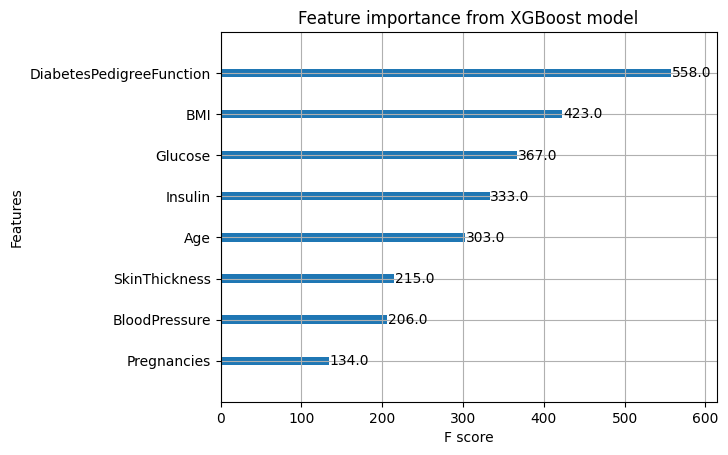

KOMBINACJA NUMER 2
n_estimators=1000, learning_rate=0.8, max_depth=20
Accuracy of XGB Classifier on test data: 72.72727272727273
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

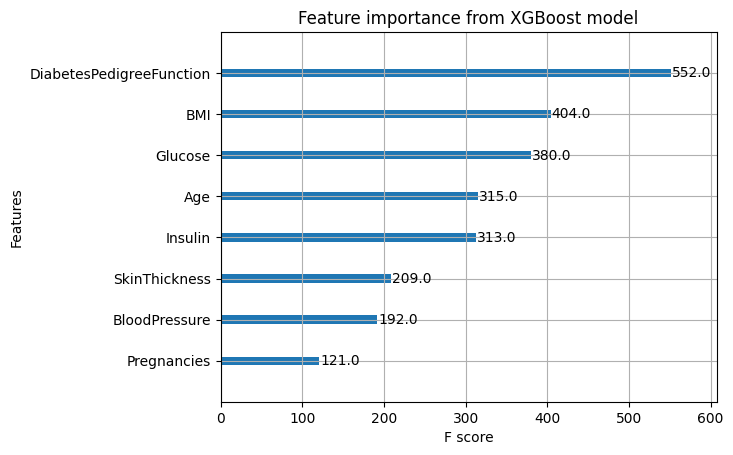

KOMBINACJA NUMER 3
n_estimators=1000, learning_rate=0.01, max_depth=5
Accuracy of XGB Classifier on test data: 75.32467532467533
Accuracy of XGB Classifier on train data: 99.81378026070763


<Figure size 640x480 with 0 Axes>

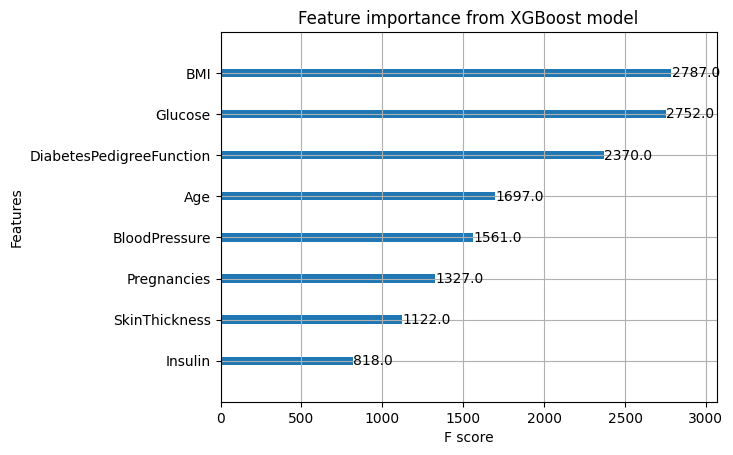

KOMBINACJA NUMER 4
n_estimators=1000, learning_rate=0.01, max_depth=20
Accuracy of XGB Classifier on test data: 73.59307359307358
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

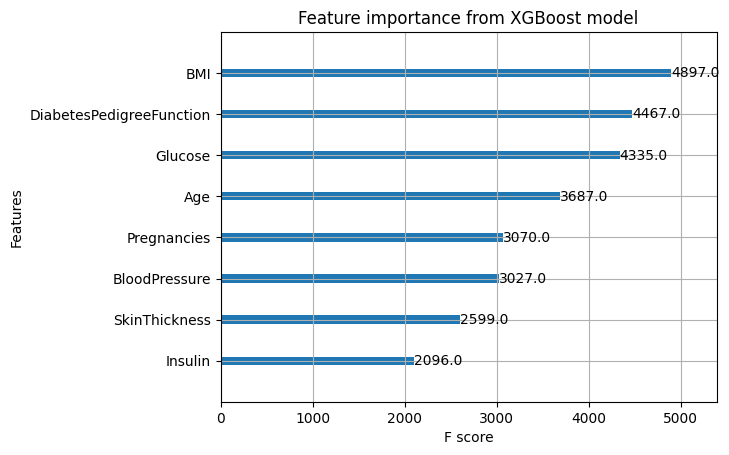

KOMBINACJA NUMER 5
n_estimators=10, learning_rate=0.8, max_depth=5
Accuracy of XGB Classifier on test data: 73.59307359307358
Accuracy of XGB Classifier on train data: 97.39292364990689


<Figure size 640x480 with 0 Axes>

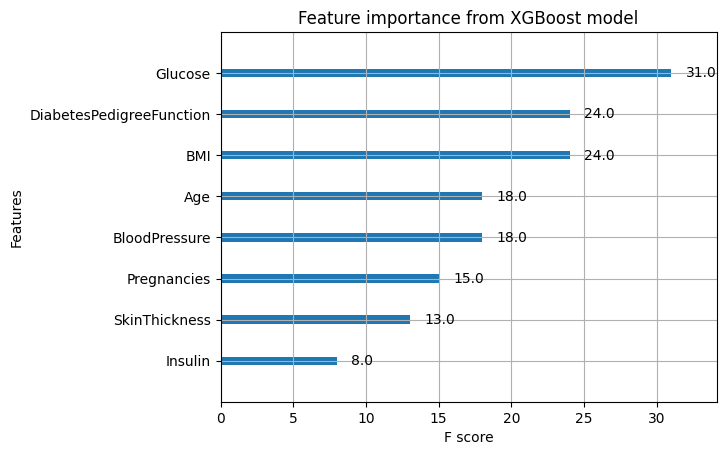

KOMBINACJA NUMER 6
n_estimators=10, learning_rate=0.8, max_depth=20
Accuracy of XGB Classifier on test data: 71.86147186147186
Accuracy of XGB Classifier on train data: 100.0


<Figure size 640x480 with 0 Axes>

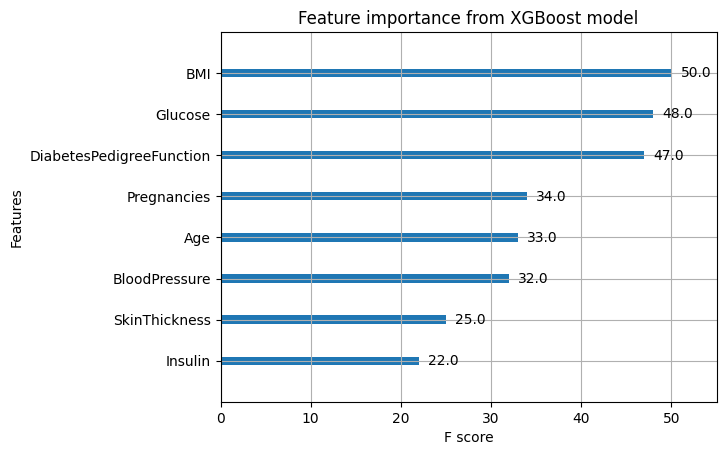

KOMBINACJA NUMER 7
n_estimators=10, learning_rate=0.01, max_depth=5
Accuracy of XGB Classifier on test data: 63.20346320346321
Accuracy of XGB Classifier on train data: 65.92178770949721


<Figure size 640x480 with 0 Axes>

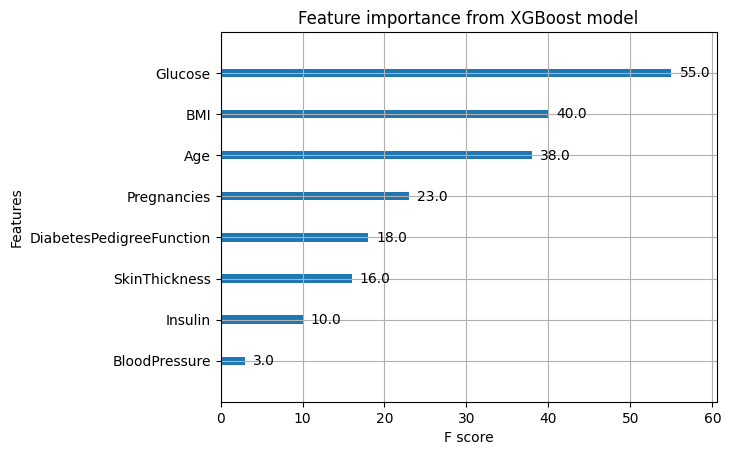

KOMBINACJA NUMER 8
n_estimators=10, learning_rate=0.01, max_depth=20
Accuracy of XGB Classifier on test data: 63.20346320346321
Accuracy of XGB Classifier on train data: 65.92178770949721


<Figure size 640x480 with 0 Axes>

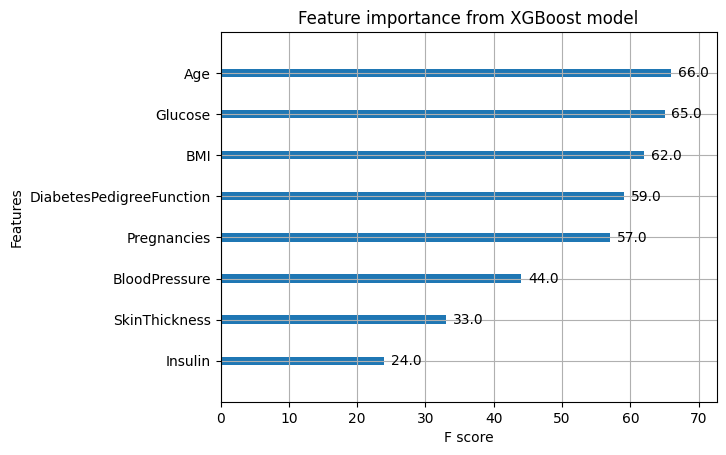

In [12]:
for est in n_estimators:
    for lr in learning_rate:
        for depth in max_depth:
            print('==================================================')
            print(f'KOMBINACJA NUMER {i}')
            print(f'n_estimators={est}, learning_rate={lr}, max_depth={depth}')
            print('==================================================')
            model = XGBClassifier(n_estimators=est, max_depth=depth, learning_rate=lr)
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            model_score = accuracy_score(y_test, y_pred)
            print(f'Accuracy of XGB Classifier on test data: {model_score * 100.0}')
            confusion_matrix(y_pred, y_test)
            
            y_pred = model.predict(X_train)
            model_score = accuracy_score(y_train, y_pred)
            print(f'Accuracy of XGB Classifier on train data: {model_score * 100.0}')
            confusion_matrix(y_pred, y_train)
            
            plt.figure()
            plot_importance(model, title='Feature importance from XGBoost model')
            plt.show()
            
            i = i + 1

# Najwyższe accuracy równe 75.3% osiąga model o następujących hiperparametrach: n_estimators=1000, learning_rate=0.01, max_depth=5.